In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
print(df.head(5))


        Ship Mode    Segment        Country  ... Quantity Discount    Profit
0    Second Class   Consumer  United States  ...        2     0.00   41.9136
1    Second Class   Consumer  United States  ...        3     0.00  219.5820
2    Second Class  Corporate  United States  ...        2     0.00    6.8714
3  Standard Class   Consumer  United States  ...        5     0.45 -383.0310
4  Standard Class   Consumer  United States  ...        2     0.20    2.5164

[5 rows x 13 columns]


In [5]:
print(df.ndim)


2


In [6]:
print(df.shape)


(9994, 13)


In [7]:
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [8]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


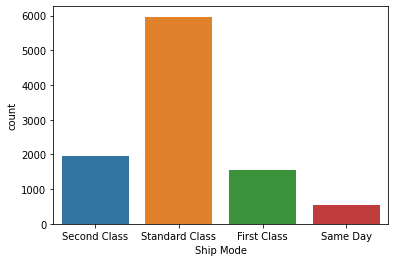

In [9]:
import seaborn as sns
sns.countplot(x='Ship Mode', data=df )

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

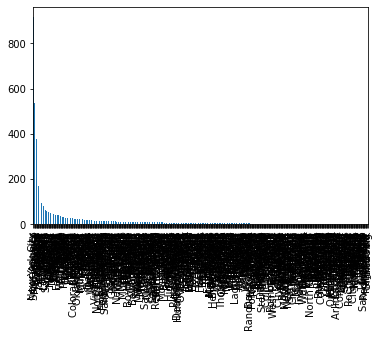

In [10]:
df['City'].value_counts().plot(kind = 'bar')


df['Region'].value_counts()

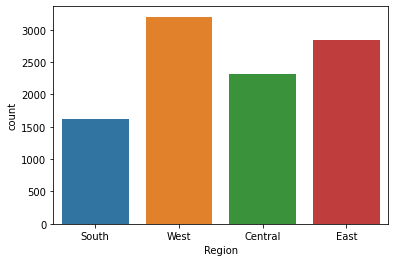

In [11]:
sns.countplot(x = 'Region', data = df )


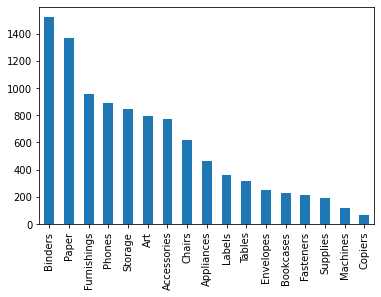

In [12]:
df['Sub-Category'].value_counts().plot(kind = 'bar')

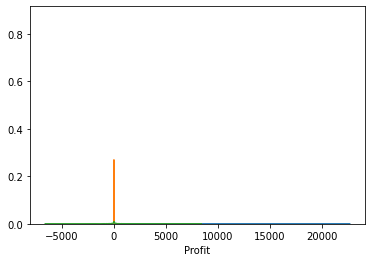

In [13]:
sns.distplot(df['Sales'] )
sns.distplot(df['Quantity'] )
sns.distplot(df['Profit'] )

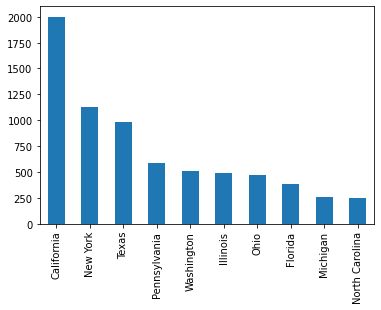

In [14]:
df['State'].value_counts().head(10).plot(kind = 'bar')

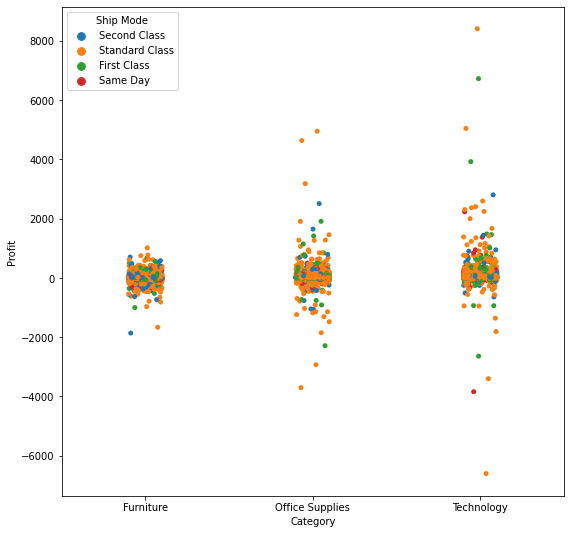

In [15]:
plt.figure(figsize = (9, 9))
sns.stripplot(x='Category',y='Profit',data=df ,hue='Ship Mode')

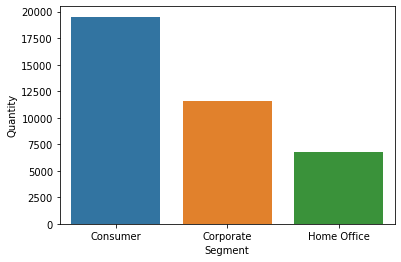

In [16]:
temp1 = df.groupby(['Segment'],as_index = False).sum()
sns.barplot(x = 'Segment', y = 'Quantity', data = temp1)

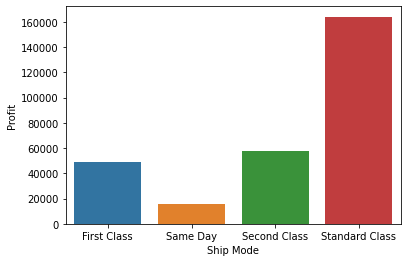

In [17]:
temp2 = df.groupby(['Ship Mode'], as_index = False)['Profit'].sum()
sns.barplot(temp2['Ship Mode'], temp2['Profit'])

In [18]:
data1 = df.groupby(['Ship Mode'])['Discount'].sum().reset_index()
data2 = df.groupby(['Region'])['Discount'].sum().reset_index()
data3 = df.groupby(['Region'], as_index = False, sort = True)['Profit'].mean()
data4 = df.groupby('Category')['Profit','Quantity'].sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


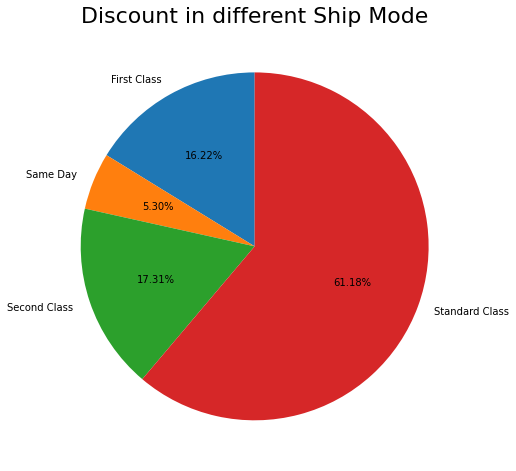

In [19]:
labels = data1['Ship Mode'].values
sizes = data1['Discount'].values
fig1, axis = plt.subplots(figsize=(8,8))
axis.pie(sizes, labels=labels, autopct='%1.2f%%',
        startangle=90)
plt.title('Discount in different Ship Mode', fontsize=22)
plt.show()

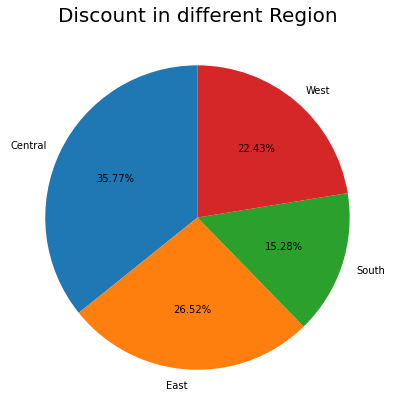

In [20]:
labels = data2['Region'].values
sizes = data2['Discount'].values
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
         startangle=90)
plt.title('Discount in different Region', fontsize=20)
plt.show()


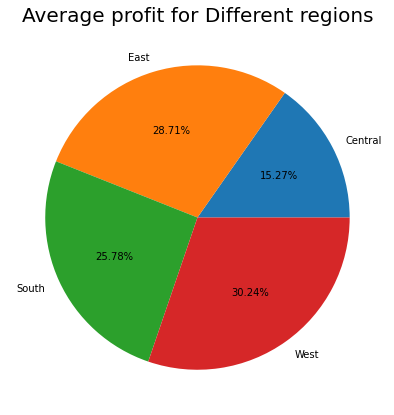

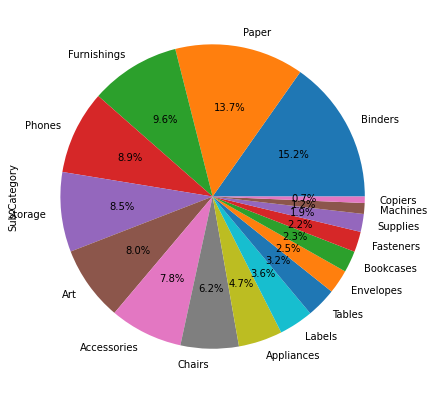

In [21]:
region = data3['Region'].values
profit = data3['Profit'].values
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(profit, labels = region, autopct='%1.2f%%')
plt.title('Average profit for Different regions', fontsize = 20)
plt.figure(figsize = (7, 7))
df['Sub-Category'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
plt.show()

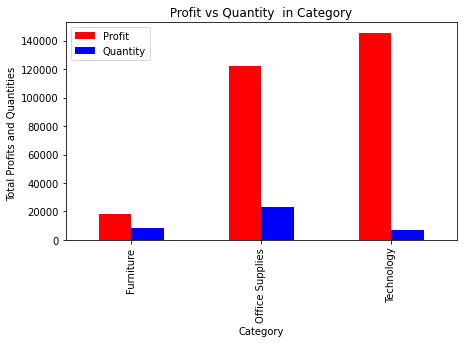

In [22]:
data4.plot( kind ="bar" ,  color = ['red','blue'] , figsize= (7,4))
plt.ylabel("Total Profits and Quantities ")
plt.title(" Profit vs Quantity  in Category ")
plt.legend()
plt.show()

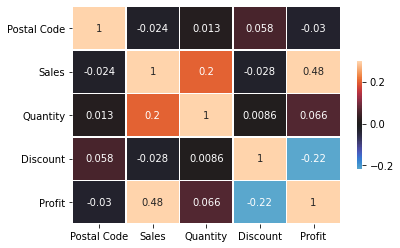

In [23]:
corr = df.corr()
sns.heatmap(corr, vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .5} , annot = True)
